In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
## Loading data

geely = pd.read_csv('../input/geely-auto/CarPriceAssignment.csv')
geely.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning

In [3]:
geely.info()

## There are no missing values in any column so no imputation is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
## Check spread of the data to check if there are any outliers
## for most of the variables - mean and median are very close
## Price looks like right skewed

geely.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Visualization

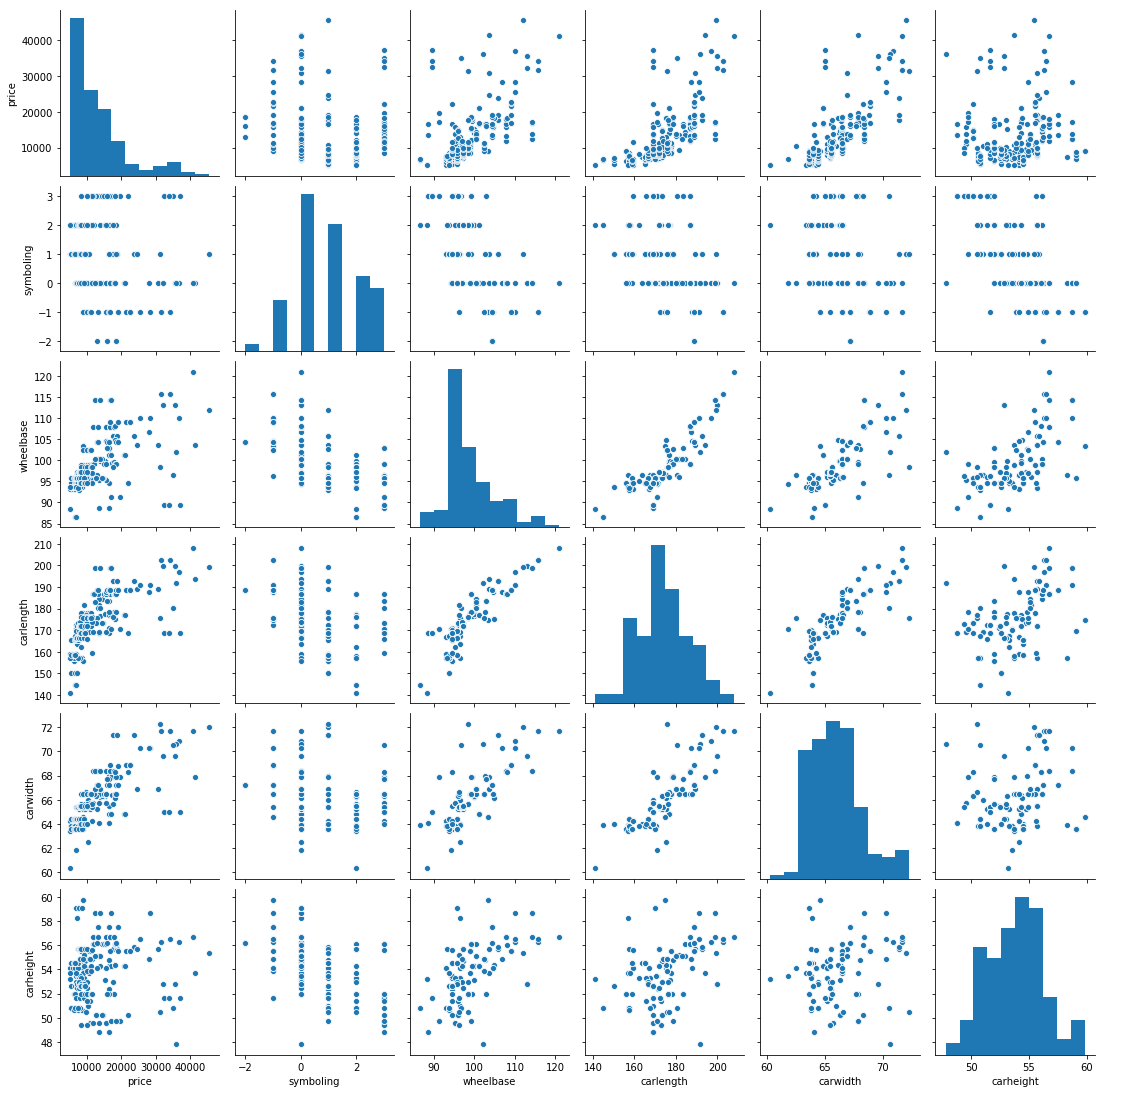

In [5]:
sns.pairplot(x_vars=['price', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight'], y_vars=['price', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight'], data=geely)

# Analysis:
# Kind of linear Relationship between (price & carwidth), (wheelbase & carlength), (carlength & carwidth) 

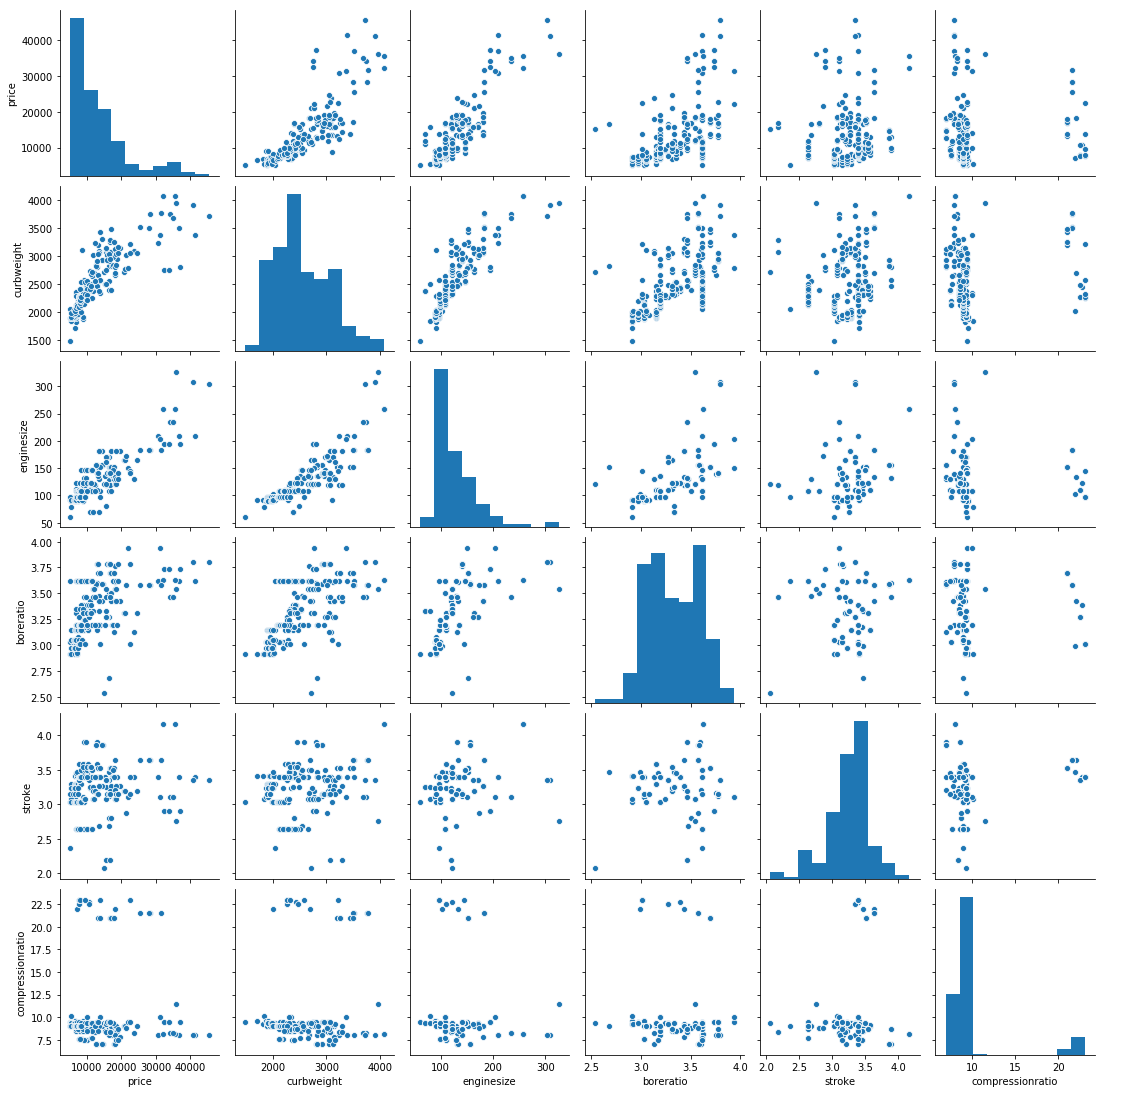

In [6]:
sns.pairplot(x_vars=['price', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio'], y_vars=['price', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio'], data=geely)

# Analysis:
# Kind of linear Relationship between (price & curbweight), (price & enginesize), (curbweight & enginesize) 

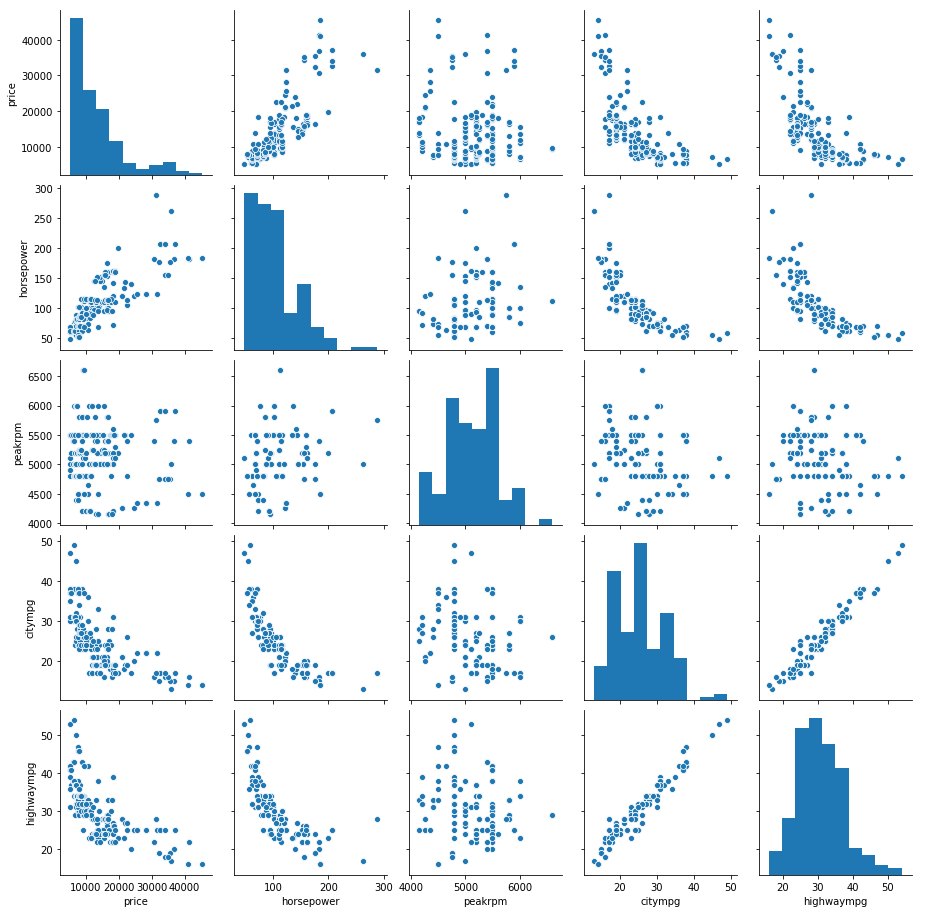

In [7]:
sns.pairplot(x_vars=['price', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], y_vars=['price', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], data=geely)

# Analysis:
# Kind of linear Relationship between (price & horsepower), (citympg & highwaympg)
# Kind of Non-Linear Relationship between (price & citympg), (price & highwaympg), (horsepower & citympg), (horsepower & highwaympg)

In [8]:
## preprocessing CarName by keeping only car company

def preprocess_carname(x):
    return x.split()[0]

geely.loc[:, 'CarName'] = geely['CarName'].apply(lambda x: preprocess_carname(x))
geely['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
vokswagen       1
Nissan          1
porcshce        1
toyouta         1
Name: CarName, dtype: int64

In [9]:
## CarName spelling mistakes correction

def carname_spelling_correction(x):
    if x in ['toyota', 'toyouta']:
        return 'toyota'
    elif x in ['volkswagen', 'vw', 'vokswagen']:
        return 'volkswagen'
    elif x in ['porsche', 'porcshce']:
        return 'porsche'
    elif x in ['nissan', 'Nissan']:
        return 'nissan'
    elif x in ['mazda', 'maxda']:
        return 'mazda'
    elif x in ['alfa-romero']:
        return 'alfa-romeo'
    return x

geely.loc[:, 'CarName'] = geely['CarName'].apply(lambda x: carname_spelling_correction(x))
geely['CarName'].value_counts()

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
subaru        12
volkswagen    12
volvo         11
peugeot       11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
alfa-romeo     3
chevrolet      3
renault        2
mercury        1
Name: CarName, dtype: int64

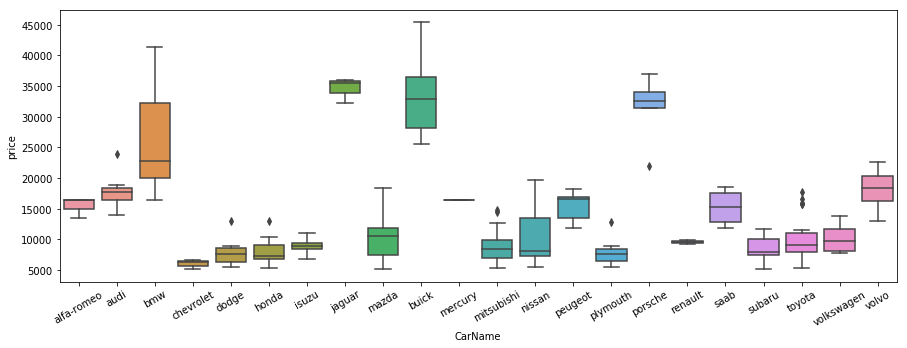

In [10]:
## Plotting car company vs price

plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
g = sns.boxplot(x='CarName', y='price', data=geely)

In [11]:
## fueltype possible values

geely['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

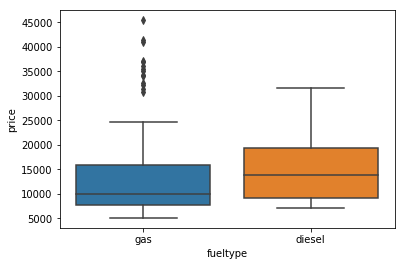

In [12]:
## Plotting fuel type vs price

# plt.figure(figsize=(15, 5))
# plt.xticks(rotation=30)
g = sns.boxplot(x='fueltype', y='price', data=geely)

In [13]:
## aspiration possible values

geely['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

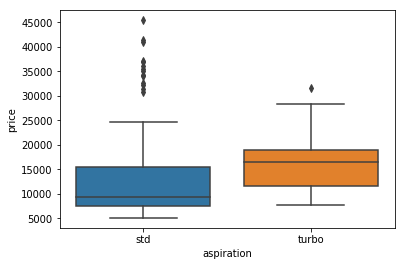

In [14]:
## Plotting aspiration vs price

# plt.figure(figsize=(15, 5))
# plt.xticks(rotation=30)
g = sns.boxplot(x='aspiration', y='price', data=geely)

In [15]:
## doornumber possible values

geely['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

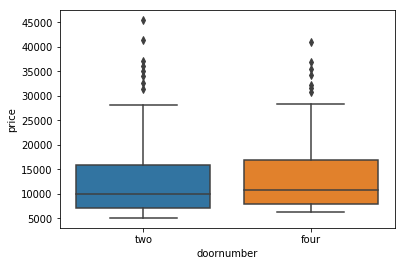

In [16]:
## Plotting doornumber vs price

# plt.figure(figsize=(15, 5))
# plt.xticks(rotation=30)
g = sns.boxplot(x='doornumber', y='price', data=geely)

In [17]:
## carbody possible values

geely['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

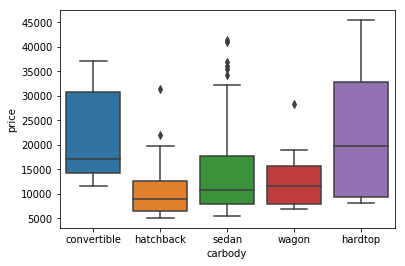

In [18]:
## Plotting carbody vs price

g = sns.boxplot(x='carbody', y='price', data=geely)

In [19]:
## drivewheel possible values

geely['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

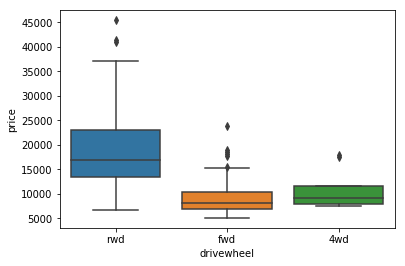

In [20]:
## Plotting drivewheel vs price

g = sns.boxplot(x='drivewheel', y='price', data=geely)

In [21]:
## enginelocation possible values

geely['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

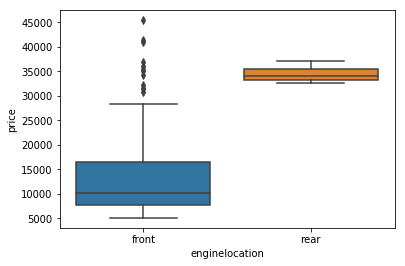

In [22]:
## Plotting enginelocation vs price

g = sns.boxplot(x='enginelocation', y='price', data=geely)

In [23]:
## enginetype possible values

geely['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

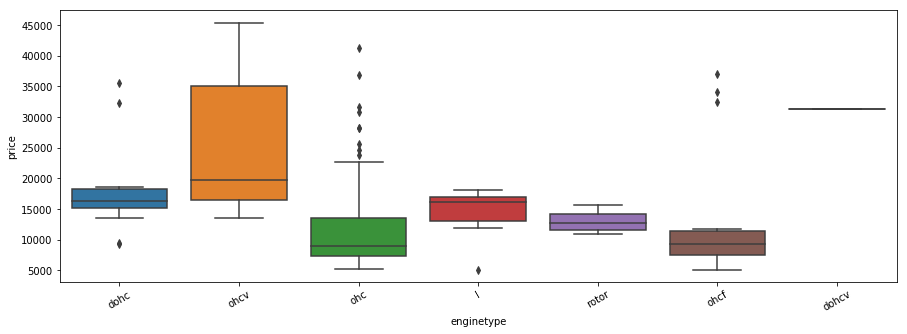

In [24]:
## Plotting enginetype vs price

plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
g = sns.boxplot(x='enginetype', y='price', data=geely)

In [25]:
## cylindernumber possible values

geely['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

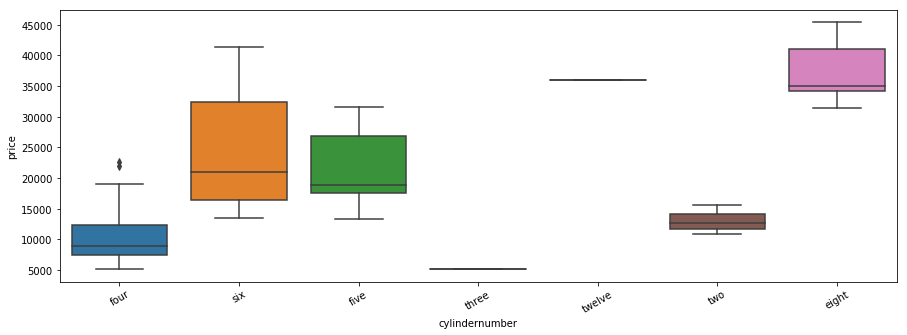

In [26]:
## Plotting cylindernumber vs price

plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
g = sns.boxplot(x='cylindernumber', y='price', data=geely)

In [27]:
## fuelsystem possible values

geely['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

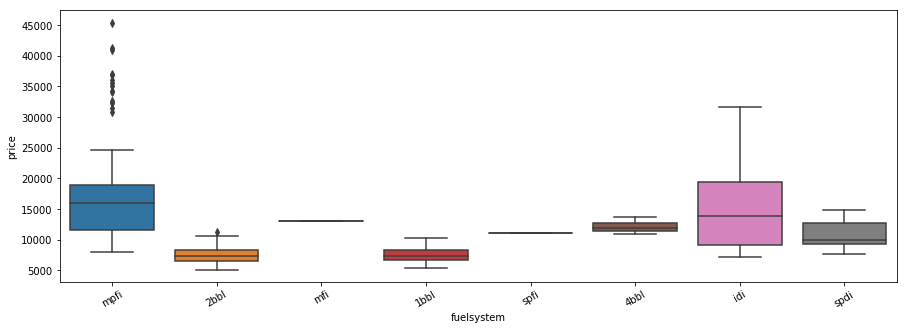

In [28]:
## Plotting fuelsystem vs price

plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
g = sns.boxplot(x='fuelsystem', y='price', data=geely)

## Data Preparation

In [29]:
## dropping car_ID as it is unique for all the data points and independent of the dependent variable (price)

geely = geely.drop(['car_ID'], axis=1)

In [30]:
## convert fuel type, aspiration, door number, engine location to binary 

geely.loc[:, 'fueltype'] = geely['fueltype'].apply(lambda x: 1 if x=='gas' else 0)
geely.loc[:, 'aspiration'] = geely['aspiration'].apply(lambda x: 1 if x=='std' else 0)
geely.loc[:, 'doornumber'] = geely['doornumber'].apply(lambda x: 1 if x=='four' else 0)
geely.loc[:, 'enginelocation'] = geely['enginelocation'].apply(lambda x: 1 if x=='front' else 0)

In [31]:
## create dummy variables all the other categorical variable (there is no order in the labels (except cylindernumber) so label encoder can't be used)

geely = pd.get_dummies(geely, drop_first=True)
geely.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [32]:
geely.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
CarName_audi             205 non-null uint8

## Data Correlation

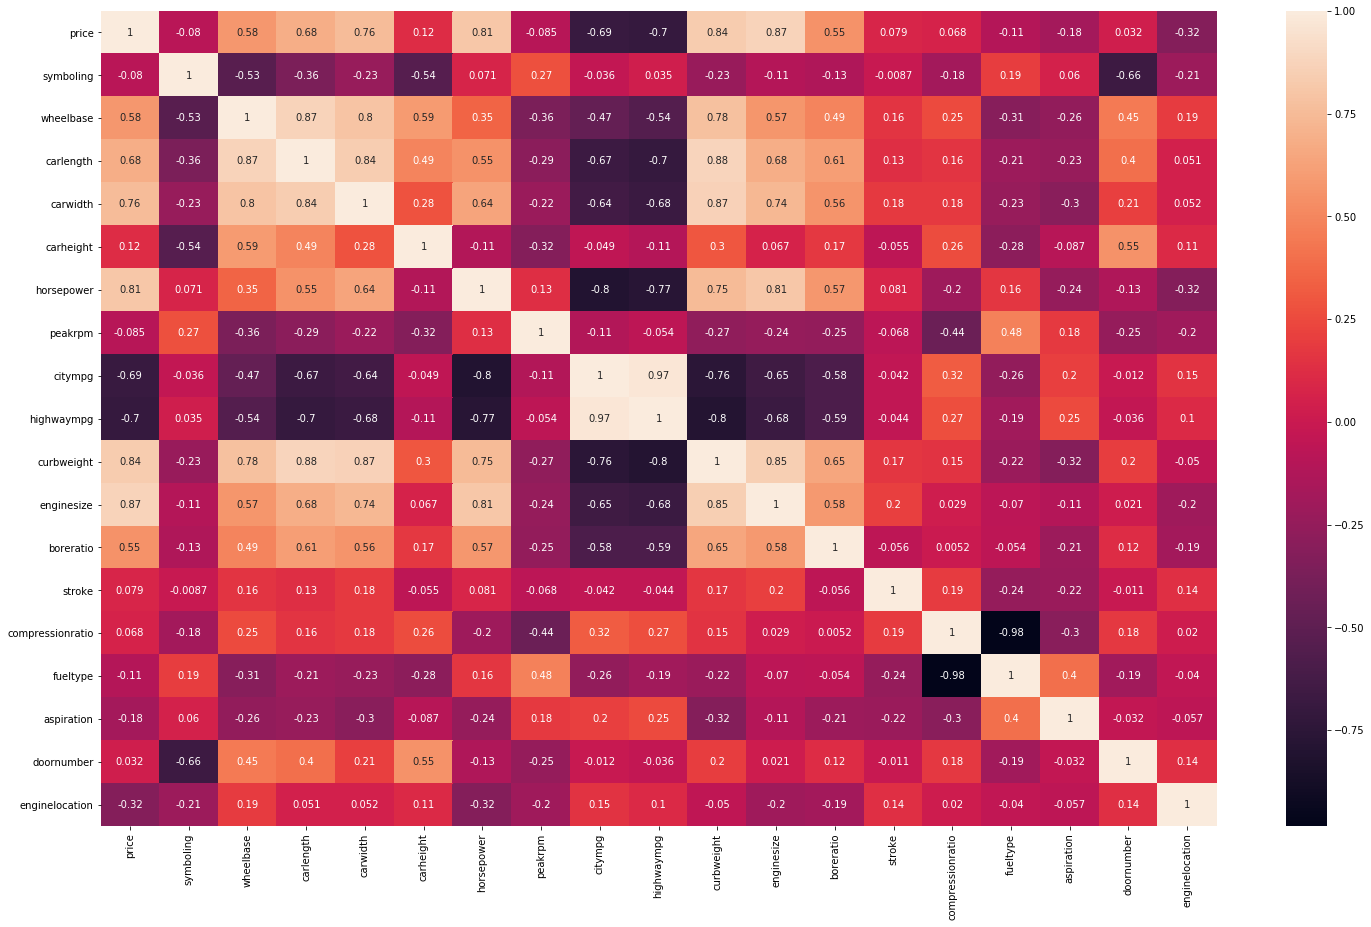

In [33]:
## Plotting correlation without dummy categorical variables

plt.figure(figsize=(25, 15))
sns.heatmap(geely[['price', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'fueltype', 'aspiration', 'doornumber', 'enginelocation']].corr(), annot=True)

# Analysis
# price is highly correlated with enginesize, curbweight, horsepower, carwidth
# enginesize is highly correlated with curbweight, horsepower, carwidth

## Splitting data into train/test set

In [34]:
## Splitting the data 70-30

geely_train, geely_test = train_test_split(geely, test_size=0.3, random_state=42)
print(geely_train.shape, geely_test.shape)

(143, 65) (62, 65)


## Rescaling data

In [35]:
## Using MinMaxScaler as dummy variables are binary so converting all the other values in the range [0,1]

scaler = MinMaxScaler()

num_vars = ['price', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio']

## fitting the Scaler on train data and then transforming train data as per the scaling params
geely_train[num_vars] = scaler.fit_transform(geely_train[num_vars])

## transforming test data as per the scaling params
geely_test[num_vars] = scaler.transform(geely_test[num_vars])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [36]:
## Train data after scaling

geely_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
177,0.2,1,1,1,1,0.544828,0.534483,0.447619,0.508333,0.284379,...,0,0,0,0,0,0,0,1,0,0
75,0.6,1,0,0,1,0.555172,0.582759,0.590476,0.583333,0.485536,...,0,0,0,0,0,0,0,1,0,0
174,0.2,0,0,1,1,0.544828,0.534483,0.447619,0.591667,0.294170,...,0,0,0,0,0,1,0,0,0,0
31,0.8,1,1,0,1,0.000000,0.000000,0.200000,0.250000,0.000000,...,0,0,0,0,0,0,0,0,0,0
12,0.4,1,1,0,1,0.503448,0.555172,0.285714,0.541667,0.396529,...,0,0,0,0,0,0,0,1,0,0


In [37]:
## Test data after scaling

geely_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,0.4,1,1,1,1,0.582759,0.765517,0.485714,0.658333,0.627948,...,0,0,0,0,0,0,0,1,0,0
9,0.4,1,0,0,1,0.444828,0.579310,0.580952,0.350000,0.549177,...,0,0,0,0,0,0,0,1,0,0
100,0.4,1,1,1,1,0.365517,0.496552,0.323810,0.575000,0.214953,...,0,0,0,1,0,0,0,0,0,0
132,1.0,1,1,0,1,0.431034,0.724138,0.447619,0.691667,0.373387,...,0,0,0,0,0,0,0,1,0,0
68,0.2,0,0,1,1,0.806897,0.798276,0.809524,0.908333,0.859368,...,0,0,0,0,0,1,0,0,0,0


In [38]:
## Extracting X and y for linear regression modelling

y = geely_train.pop('price')
X = geely_train

print(y.shape, X.shape)

(143,) (143, 64)


## Using RFE to get top 20 independent variables

#### Recursive Feature Elimination is used to get the top 20 most important features (independent variables)

In [39]:
## Creating a LR model object
lr = LinearRegression()

## Creating RFE object
rfe = RFE(lr, 20)

## Fitting RFE (using LR model) and extracting feature importance of all the features
rfe = rfe.fit(X, y)

## listing all the column and corresponding rankings
list(zip(geely_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 25),
 ('fueltype', False, 21),
 ('aspiration', True, 1),
 ('doornumber', False, 41),
 ('enginelocation', True, 1),
 ('wheelbase', False, 27),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 26),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 30),
 ('compressionratio', False, 23),
 ('horsepower', False, 18),
 ('peakrpm', True, 1),
 ('citympg', False, 35),
 ('highwaympg', False, 40),
 ('CarName_audi', False, 43),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 8),
 ('CarName_dodge', False, 4),
 ('CarName_honda', False, 5),
 ('CarName_isuzu', False, 17),
 ('CarName_jaguar', True, 1),
 ('CarName_mazda', False, 9),
 ('CarName_mercury', False, 12),
 ('CarName_mitsubishi', True, 1),
 ('CarName_nissan', False, 3),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 2),
 ('CarName_porsche', True, 1),
 ('CarName_renault', True, 1),
 ('CarName_saab', False,

In [40]:
## Get top 20 most important features

cols = geely_train.columns[rfe.support_]
cols

Index(['aspiration', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'peakrpm', 'CarName_bmw', 'CarName_buick',
       'CarName_jaguar', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_porsche', 'CarName_renault', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_rotor',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

## Fine-tuning the Model with statsmodels and VIF

In [41]:
## Extract data for the top 20 columns

X = geely_train[cols]
X.shape, y.shape

((143, 20), (143,))

In [42]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           6.59e-79
Time:                        16:22:19   Log-Likelihood:                 268.51
No. Observations:                 143   AIC:                            -497.0
Df Residuals:                     123   BIC:                            -437.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2554      0.047      5.457      0.000       0.163       0.348
aspiration               -0.0405      0.010     -3.904      0.000      -0.061      -0.020
enginelocation           -0.2022      0.047     -4.339      0.000      -0.294      -0.110
carwidth                  0.2586      0.035      7.457      0.000       0.190       0.327
curbweight                0.2873      0.050      5.710      0.000       0.188       0.387
enginesize                0.2292      0.073      3.145      0.002       0.085       0.373
boreratio                -0.0498      0.025     -1.989      0.049      -0.099      -0.000
peakrpm                   0.0872      0.020      4.366      0.000       0.048       0.127
CarName_bmw               0.2134      0.019     11.450      0.000       0.177       0.250
CarName_buick             0.1915      0.028      6.739      0.000       0.135       0.248
CarName_jaguar            0.1633      0.037      4.408      0.000       0.090       0.237
CarName_mitsubishi       -0.0447      0.015     -2.973      0.004      -0.074      -0.015
CarName_peugeot          -0.0606      0.017     -3.535      0.001      -0.095      -0.027
CarName_porsche           0.1550      0.033      4.685      0.000       0.089       0.220
CarName_renault          -0.0536      0.029     -1.821      0.071      -0.112       0.005
carbody_hatchback        -0.0997      0.019     -5.330      0.000      -0.137      -0.063
carbody_sedan            -0.0918      0.018     -4.963      0.000      -0.128      -0.055
carbody_wagon            -0.1224      0.021     -5.845      0.000      -0.164      -0.081
enginetype_rotor          0.0528      0.016      3.238      0.002       0.021       0.085
cylindernumber_twelve    -0.0306      0.054     -0.572      0.568      -0.137       0.075
cylindernumber_two        0.0528      0.016      3.238      0.002       0.021       0.085
==============================================================================
Omnibus:                        3.502   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                3.788
Skew:                           0.113   Prob(JB):                        0.150
Kurtosis:                       3.765   Cond. No.                     1.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  4e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_sm.values, i), 2) for i in range(X_train_sm.shape[1])]
vif.sort_values(by='VIF', ascending='False')

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
13,CarName_renault,1.09
10,CarName_mitsubishi,1.13
7,CarName_bmw,1.29
11,CarName_peugeot,1.63
18,cylindernumber_twelve,1.78
8,CarName_buick,2.02
12,CarName_porsche,2.23
9,CarName_jaguar,2.51
16,carbody_wagon,4.59
6,peakrpm,6.73


#### Dropping cylindernumber_twelve as the p_value is very high (0.568)

In [44]:
## Dropping cylindernumber_twelve

cols = cols.drop('cylindernumber_twelve')
cols

Index(['aspiration', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'peakrpm', 'CarName_bmw', 'CarName_buick',
       'CarName_jaguar', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_porsche', 'CarName_renault', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_rotor',
       'cylindernumber_two'],
      dtype='object')

In [45]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [46]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     181.5
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           5.66e-80
Time:                        16:22:19   Log-Likelihood:                 268.32
No. Observations:                 143   AIC:                            -498.6
Df Residuals:                     124   BIC:                            -442.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2580      0.046      5.554      0.000       0.166       0.350
aspiration            -0.0398      0.010     -3.873      0.000      -0.060      -0.019
enginelocation        -0.2042      0.046     -4.404      0.000      -0.296      -0.112
carwidth               0.2577      0.035      7.459      0.000       0.189       0.326
curbweight             0.2965      0.048      6.232      0.000       0.202       0.391
enginesize             0.2126      0.067      3.189      0.002       0.081       0.345
boreratio             -0.0489      0.025     -1.962      0.052      -0.098       0.000
peakrpm                0.0863      0.020      4.346      0.000       0.047       0.126
CarName_bmw            0.2141      0.019     11.543      0.000       0.177       0.251
CarName_buick          0.1941      0.028      6.936      0.000       0.139       0.249
CarName_jaguar         0.1573      0.035      4.441      0.000       0.087       0.227
CarName_mitsubishi    -0.0444      0.015     -2.964      0.004      -0.074      -0.015
CarName_peugeot       -0.0620      0.017     -3.663      0.000      -0.096      -0.029
CarName_porsche        0.1560      0.033      4.736      0.000       0.091       0.221
CarName_renault       -0.0529      0.029     -1.802      0.074      -0.111       0.005
carbody_hatchback     -0.0999      0.019     -5.358      0.000      -0.137      -0.063
carbody_sedan         -0.0924      0.018     -5.022      0.000      -0.129      -0.056
carbody_wagon         -0.1238      0.021     -5.974      0.000      -0.165      -0.083
enginetype_rotor       0.0513      0.016      3.196      0.002       0.020       0.083
cylindernumber_two     0.0513      0.016      3.196      0.002       0.020       0.083
==============================================================================
Omnibus:                        4.111   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.661
Skew:                           0.148   Prob(JB):                       0.0972
Kurtosis:                       3.833   Cond. No.                     1.17e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by='VIF', ascending='False')

,features,VIF
13,CarName_renault,1.087622
10,CarName_mitsubishi,1.132444
7,CarName_bmw,1.285649
11,CarName_peugeot,1.604456
8,CarName_buick,1.975580
12,CarName_porsche,2.201025
9,CarName_jaguar,2.275358
16,carbody_wagon,4.538561
6,peakrpm,6.705527
0,aspiration,7.629520


#### Dropping CarName_renault as the p_value is high (0.074)

In [48]:
## Dropping CarName_renault

cols = cols.drop('CarName_renault')
cols

Index(['aspiration', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'peakrpm', 'CarName_bmw', 'CarName_buick',
       'CarName_jaguar', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_porsche', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_rotor', 'cylindernumber_two'],
      dtype='object')

In [49]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [50]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.00e-80
Time:                        16:22:19   Log-Likelihood:                 266.47
No. Observations:                 143   AIC:                            -496.9
Df Residuals:                     125   BIC:                            -443.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2589      0.047      5.524      0.000       0.166       0.352
aspiration            -0.0405      0.010     -3.908      0.000      -0.061      -0.020
enginelocation        -0.2008      0.047     -4.297      0.000      -0.293      -0.108
carwidth               0.2510      0.035      7.243      0.000       0.182       0.320
curbweight             0.3083      0.048      6.486      0.000       0.214       0.402
enginesize             0.2028      0.067      3.025      0.003       0.070       0.335
boreratio             -0.0534      0.025     -2.135      0.035      -0.103      -0.004
peakrpm                0.0863      0.020      4.307      0.000       0.047       0.126
CarName_bmw            0.2148      0.019     11.479      0.000       0.178       0.252
CarName_buick          0.1966      0.028      6.970      0.000       0.141       0.252
CarName_jaguar         0.1594      0.036      4.462      0.000       0.089       0.230
CarName_mitsubishi    -0.0436      0.015     -2.888      0.005      -0.074      -0.014
CarName_peugeot       -0.0609      0.017     -3.569      0.001      -0.095      -0.027
CarName_porsche        0.1615      0.033      4.880      0.000       0.096       0.227
carbody_hatchback     -0.1016      0.019     -5.407      0.000      -0.139      -0.064
carbody_sedan         -0.0931      0.019     -5.014      0.000      -0.130      -0.056
carbody_wagon         -0.1285      0.021     -6.196      0.000      -0.170      -0.087
enginetype_rotor       0.0513      0.016      3.168      0.002       0.019       0.083
cylindernumber_two     0.0513      0.016      3.168      0.002       0.019       0.083
==============================================================================
Omnibus:                        3.950   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                4.249
Skew:                           0.167   Prob(JB):                        0.119
Kurtosis:                       3.775   Cond. No.                     1.21e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF'], ascending='True')

,features,VIF
10,CarName_mitsubishi,1.131503
7,CarName_bmw,1.285183
11,CarName_peugeot,1.602191
8,CarName_buick,1.970982
12,CarName_porsche,2.175088
9,CarName_jaguar,2.273162
15,carbody_wagon,4.466704
6,peakrpm,6.705451
0,aspiration,7.619514
13,carbody_hatchback,10.209096


#### Dropping cylindernumber_two as the vif value is very high

In [52]:
## Dropping cylindernumber_two

cols = cols.drop('cylindernumber_two')
cols

Index(['aspiration', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'peakrpm', 'CarName_bmw', 'CarName_buick',
       'CarName_jaguar', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_porsche', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_rotor'],
      dtype='object')

In [53]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [54]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.00e-80
Time:                        16:22:19   Log-Likelihood:                 266.47
No. Observations:                 143   AIC:                            -496.9
Df Residuals:                     125   BIC:                            -443.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2589      0.047      5.524      0.000       0.166       0.352
aspiration            -0.0405      0.010     -3.908      0.000      -0.061      -0.020
enginelocation        -0.2008      0.047     -4.297      0.000      -0.293      -0.108
carwidth               0.2510      0.035      7.243      0.000       0.182       0.320
curbweight             0.3083      0.048      6.486      0.000       0.214       0.402
enginesize             0.2028      0.067      3.025      0.003       0.070       0.335
boreratio             -0.0534      0.025     -2.135      0.035      -0.103      -0.004
peakrpm                0.0863      0.020      4.307      0.000       0.047       0.126
CarName_bmw            0.2148      0.019     11.479      0.000       0.178       0.252
CarName_buick          0.1966      0.028      6.970      0.000       0.141       0.252
CarName_jaguar         0.1594      0.036      4.462      0.000       0.089       0.230
CarName_mitsubishi    -0.0436      0.015     -2.888      0.005      -0.074      -0.014
CarName_peugeot       -0.0609      0.017     -3.569      0.001      -0.095      -0.027
CarName_porsche        0.1615      0.033      4.880      0.000       0.096       0.227
carbody_hatchback     -0.1016      0.019     -5.407      0.000      -0.139      -0.064
carbody_sedan         -0.0931      0.019     -5.014      0.000      -0.130      -0.056
carbody_wagon         -0.1285      0.021     -6.196      0.000      -0.170      -0.087
enginetype_rotor       0.1027      0.032      3.168      0.002       0.039       0.167
==============================================================================
Omnibus:                        3.950   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                4.249
Skew:                           0.167   Prob(JB):                        0.119
Kurtosis:                       3.775   Cond. No.                         48.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF'], ascending='True')

,features,VIF
10,CarName_mitsubishi,1.131503
7,CarName_bmw,1.285183
16,enginetype_rotor,1.298897
11,CarName_peugeot,1.602191
8,CarName_buick,1.970982
12,CarName_porsche,2.175088
9,CarName_jaguar,2.273162
15,carbody_wagon,4.466704
6,peakrpm,6.705451
0,aspiration,7.619514


#### All the coefficients are significant (p_value is small), VIF is high for few independent variable but lets check test data r2 value

In [56]:
# Train LR model on train data
lr = LinearRegression()
lr = lr.fit(X, y)
print(lr.coef_)

# Extract test data
y_test = geely_test['price']
X_test = geely_test[cols]

# Compute r2 score for test data
r2_score(y_test, lr.predict(X_test))

## R2 on test data is 86.5% and train data is 96.2% so difference is high so the LR model is not generalised yet

[-0.04046436 -0.20078705  0.25102216  0.30829776  0.20278597 -0.05340332
  0.08628767  0.21478937  0.19655577  0.15935797 -0.04363301 -0.0609126
  0.16148333 -0.10156435 -0.09306617 -0.12851596  0.10265181]


0.8648632930042511

#### Dropping enginelocation due to high VIF value (61.59)

In [57]:
## Dropping enginelocation

cols = cols.drop('enginelocation')
cols

Index(['aspiration', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'peakrpm', 'CarName_bmw', 'CarName_buick', 'CarName_jaguar',
       'CarName_mitsubishi', 'CarName_peugeot', 'CarName_porsche',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_rotor'],
      dtype='object')

In [58]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [59]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           7.79e-78
Time:                        16:22:19   Log-Likelihood:                 256.62
No. Observations:                 143   AIC:                            -479.2
Df Residuals:                     126   BIC:                            -428.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0932      0.028      3.281      0.001       0.037       0.149
aspiration            -0.0474      0.011     -4.342      0.000      -0.069      -0.026
carwidth               0.2158      0.036      6.006      0.000       0.145       0.287
curbweight             0.2965      0.051      5.855      0.000       0.196       0.397
enginesize             0.2619      0.070      3.740      0.000       0.123       0.400
boreratio             -0.0649      0.027     -2.446      0.016      -0.117      -0.012
peakrpm                0.0931      0.021      4.368      0.000       0.051       0.135
CarName_bmw            0.2126      0.020     10.650      0.000       0.173       0.252
CarName_buick          0.1876      0.030      6.252      0.000       0.128       0.247
CarName_jaguar         0.1485      0.038      3.906      0.000       0.073       0.224
CarName_mitsubishi    -0.0435      0.016     -2.701      0.008      -0.075      -0.012
CarName_peugeot       -0.0521      0.018     -2.879      0.005      -0.088      -0.016
CarName_porsche        0.2521      0.027      9.268      0.000       0.198       0.306
carbody_hatchback     -0.1284      0.019     -6.790      0.000      -0.166      -0.091
carbody_sedan         -0.1132      0.019     -5.908      0.000      -0.151      -0.075
carbody_wagon         -0.1469      0.022     -6.785      0.000      -0.190      -0.104
enginetype_rotor       0.1179      0.034      3.432      0.001       0.050       0.186
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.778
Skew:                          -0.051   Prob(JB):                        0.411
Kurtosis:                       3.537   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF'], ascending='True')

,features,VIF
9,CarName_mitsubishi,1.129472
6,CarName_bmw,1.265866
15,enginetype_rotor,1.280102
11,CarName_porsche,1.561130
10,CarName_peugeot,1.600169
7,CarName_buick,1.958131
8,CarName_jaguar,2.202295
14,carbody_wagon,3.121109
12,carbody_hatchback,4.999750
5,peakrpm,6.039744


#### Dropping curbweight due to high VIF (33.2)

In [61]:
## Dropping curbweight

cols = cols.drop(['curbweight'])
cols

Index(['aspiration', 'carwidth', 'enginesize', 'boreratio', 'peakrpm',
       'CarName_bmw', 'CarName_buick', 'CarName_jaguar', 'CarName_mitsubishi',
       'CarName_peugeot', 'CarName_porsche', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_rotor'],
      dtype='object')

In [62]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [63]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.23e-72
Time:                        16:22:19   Log-Likelihood:                 239.42
No. Observations:                 143   AIC:                            -446.8
Df Residuals:                     127   BIC:                            -399.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0949      0.032      2.976      0.003       0.032       0.158
aspiration            -0.0690      0.012     -5.977      0.000      -0.092      -0.046
carwidth               0.3175      0.035      8.985      0.000       0.248       0.387
enginesize             0.5196      0.061      8.497      0.000       0.399       0.641
boreratio             -0.0395      0.029     -1.344      0.181      -0.098       0.019
peakrpm                0.0970      0.024      4.053      0.000       0.050       0.144
CarName_bmw            0.2205      0.022      9.855      0.000       0.176       0.265
CarName_buick          0.1713      0.034      5.104      0.000       0.105       0.238
CarName_jaguar         0.1496      0.043      3.503      0.001       0.065       0.234
CarName_mitsubishi    -0.0494      0.018     -2.735      0.007      -0.085      -0.014
CarName_peugeot       -0.0191      0.019     -0.988      0.325      -0.057       0.019
CarName_porsche        0.2214      0.030      7.384      0.000       0.162       0.281
carbody_hatchback     -0.1366      0.021     -6.449      0.000      -0.178      -0.095
carbody_sedan         -0.1143      0.022     -5.311      0.000      -0.157      -0.072
carbody_wagon         -0.1192      0.024     -5.022      0.000      -0.166      -0.072
enginetype_rotor       0.1682      0.037      4.499      0.000       0.094       0.242
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.214
Skew:                           0.055   Prob(JB):                        0.898
Kurtosis:                       2.846   Cond. No.                         31.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF'], ascending='True')

,features,VIF
8,CarName_mitsubishi,1.125120
14,enginetype_rotor,1.200371
5,CarName_bmw,1.260220
9,CarName_peugeot,1.444152
10,CarName_porsche,1.500091
6,CarName_buick,1.941453
7,CarName_jaguar,2.202283
13,carbody_wagon,2.902646
11,carbody_hatchback,4.958628
0,aspiration,5.321312


#### Dropping CarName_peugeot as the p_value is very high (0.325)

In [65]:
## Dropping CarName_peugeot

cols = cols.drop(['CarName_peugeot'])
cols

Index(['aspiration', 'carwidth', 'enginesize', 'boreratio', 'peakrpm',
       'CarName_bmw', 'CarName_buick', 'CarName_jaguar', 'CarName_mitsubishi',
       'CarName_porsche', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_rotor'],
      dtype='object')

In [66]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [67]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.83e-73
Time:                        16:22:19   Log-Likelihood:                 238.87
No. Observations:                 143   AIC:                            -447.7
Df Residuals:                     128   BIC:                            -403.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0935      0.032      2.933      0.004       0.030       0.157
aspiration            -0.0680      0.011     -5.913      0.000      -0.091      -0.045
carwidth               0.3085      0.034      9.037      0.000       0.241       0.376
enginesize             0.5278      0.061      8.710      0.000       0.408       0.648
boreratio             -0.0424      0.029     -1.450      0.149      -0.100       0.015
peakrpm                0.1015      0.023      4.324      0.000       0.055       0.148
CarName_bmw            0.2216      0.022      9.919      0.000       0.177       0.266
CarName_buick          0.1759      0.033      5.292      0.000       0.110       0.242
CarName_jaguar         0.1505      0.043      3.526      0.001       0.066       0.235
CarName_mitsubishi    -0.0491      0.018     -2.715      0.008      -0.085      -0.013
CarName_porsche        0.2221      0.030      7.410      0.000       0.163       0.281
carbody_hatchback     -0.1350      0.021     -6.394      0.000      -0.177      -0.093
carbody_sedan         -0.1136      0.022     -5.280      0.000      -0.156      -0.071
carbody_wagon         -0.1205      0.024     -5.086      0.000      -0.167      -0.074
enginetype_rotor       0.1684      0.037      4.506      0.000       0.094       0.242
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.178
Skew:                           0.033   Prob(JB):                        0.915
Kurtosis:                       2.841   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF'], ascending='True')

,features,VIF
8,CarName_mitsubishi,1.124727
13,enginetype_rotor,1.200236
5,CarName_bmw,1.255734
9,CarName_porsche,1.498448
6,CarName_buick,1.905288
7,CarName_jaguar,2.199664
12,carbody_wagon,2.875295
10,carbody_hatchback,4.941838
0,aspiration,5.289361
4,peakrpm,5.810457


#### Dropping boreratio as the p_value is high (0.149)

In [69]:
## Dropping boreratio

cols = cols.drop(['boreratio'])
cols

Index(['aspiration', 'carwidth', 'enginesize', 'peakrpm', 'CarName_bmw',
       'CarName_buick', 'CarName_jaguar', 'CarName_mitsubishi',
       'CarName_porsche', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_rotor'],
      dtype='object')

In [70]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [71]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           6.05e-74
Time:                        16:22:20   Log-Likelihood:                 237.70
No. Observations:                 143   AIC:                            -447.4
Df Residuals:                     129   BIC:                            -405.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0697      0.027      2.540      0.012       0.015       0.124
aspiration            -0.0654      0.011     -5.734      0.000      -0.088      -0.043
carwidth               0.2996      0.034      8.884      0.000       0.233       0.366
enginesize             0.5053      0.059      8.589      0.000       0.389       0.622
peakrpm                0.1093      0.023      4.764      0.000       0.064       0.155
CarName_bmw            0.2209      0.022      9.848      0.000       0.177       0.265
CarName_buick          0.1862      0.033      5.712      0.000       0.122       0.251
CarName_jaguar         0.1593      0.042      3.754      0.000       0.075       0.243
CarName_mitsubishi    -0.0484      0.018     -2.666      0.009      -0.084      -0.012
CarName_porsche        0.2117      0.029      7.244      0.000       0.154       0.269
carbody_hatchback     -0.1307      0.021     -6.225      0.000      -0.172      -0.089
carbody_sedan         -0.1102      0.021     -5.130      0.000      -0.153      -0.068
carbody_wagon         -0.1191      0.024     -5.008      0.000      -0.166      -0.072
enginetype_rotor       0.1591      0.037      4.303      0.000       0.086       0.232
==============================================================================
Omnibus:                        0.088   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.062
Skew:                           0.047   Prob(JB):                        0.969
Kurtosis:                       2.960   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF'], ascending='True')

,features,VIF
7,CarName_mitsubishi,1.124727
12,enginetype_rotor,1.170446
4,CarName_bmw,1.248230
8,CarName_porsche,1.453820
5,CarName_buick,1.808347
6,CarName_jaguar,1.955536
11,carbody_wagon,2.550773
9,carbody_hatchback,4.428505
0,aspiration,5.237568
3,peakrpm,5.808696


#### All the coefficients are significant (p_value is small), VIF is high for few independent variable but lets check test data r2 value

In [73]:
# Train LR model on train data
lr = LinearRegression()
lr = lr.fit(X, y)
print(lr.coef_)

# Extract test data
y_test = geely_test['price']
X_test = geely_test[cols]

# Compute r2 score for test data
r2_score(y_test, lr.predict(X_test))

## R2 on test data is 86.0% and train data is 94.4% so difference is high so the LR model is not generalised yet

[-0.06538757  0.29959735  0.50533238  0.10933871  0.22089486  0.18624378
  0.15928606 -0.04835989  0.21166482 -0.13069331 -0.11015303 -0.119095
  0.15914444]


0.8603494467543894

#### Dropping carwidth due to high VIF (14.1)

In [74]:
## Dropping carwidth

cols = cols.drop(['carwidth'])
cols

Index(['aspiration', 'enginesize', 'peakrpm', 'CarName_bmw', 'CarName_buick',
       'CarName_jaguar', 'CarName_mitsubishi', 'CarName_porsche',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_rotor'],
      dtype='object')

In [75]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [76]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.09e-61
Time:                        16:22:20   Log-Likelihood:                 203.57
No. Observations:                 143   AIC:                            -381.1
Df Residuals:                     130   BIC:                            -342.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0718      0.035      2.069      0.041       0.003       0.141
aspiration            -0.0920      0.014     -6.608      0.000      -0.119      -0.064
enginesize             0.8416      0.057     14.772      0.000       0.729       0.954
peakrpm                0.1137      0.029      3.920      0.000       0.056       0.171
CarName_bmw            0.1864      0.028      6.672      0.000       0.131       0.242
CarName_buick          0.2210      0.041      5.399      0.000       0.140       0.302
CarName_jaguar         0.0646      0.052      1.244      0.216      -0.038       0.167
CarName_mitsubishi    -0.0586      0.023     -2.560      0.012      -0.104      -0.013
CarName_porsche        0.2198      0.037      5.950      0.000       0.147       0.293
carbody_hatchback     -0.0734      0.025     -2.903      0.004      -0.123      -0.023
carbody_sedan         -0.0369      0.025     -1.470      0.144      -0.086       0.013
carbody_wagon         -0.0400      0.028     -1.435      0.154      -0.095       0.015
enginetype_rotor       0.2277      0.046      4.977      0.000       0.137       0.318
==============================================================================
Omnibus:                        3.813   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.282
Skew:                           0.332   Prob(JB):                        0.194
Kurtosis:                       3.333   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF Factor'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF Factor'], ascending='True')

,features,VIF Factor
11,enginetype_rotor,1.119433
6,CarName_mitsubishi,1.120233
3,CarName_bmw,1.208812
7,CarName_porsche,1.452452
4,CarName_buick,1.782386
5,CarName_jaguar,1.805636
10,carbody_wagon,1.957536
8,carbody_hatchback,3.556555
9,carbody_sedan,4.559911
0,aspiration,4.805804


#### Dropping CarName_jaguar as the p_value is very high (0.216)

In [78]:
## Dropping CarName_jaguar

cols = cols.drop(['CarName_jaguar'])
cols

Index(['aspiration', 'enginesize', 'peakrpm', 'CarName_bmw', 'CarName_buick',
       'CarName_mitsubishi', 'CarName_porsche', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_rotor'],
      dtype='object')

In [79]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [80]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     118.3
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.09e-62
Time:                        16:22:20   Log-Likelihood:                 202.73
No. Observations:                 143   AIC:                            -381.5
Df Residuals:                     131   BIC:                            -345.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0542      0.032      1.707      0.090      -0.009       0.117
aspiration            -0.0884      0.014     -6.478      0.000      -0.115      -0.061
enginesize             0.8919      0.040     22.190      0.000       0.812       0.971
peakrpm                0.1158      0.029      3.990      0.000       0.058       0.173
CarName_bmw            0.1766      0.027      6.575      0.000       0.123       0.230
CarName_buick          0.1990      0.037      5.380      0.000       0.126       0.272
CarName_mitsubishi    -0.0586      0.023     -2.552      0.012      -0.104      -0.013
CarName_porsche        0.2073      0.036      5.820      0.000       0.137       0.278
carbody_hatchback     -0.0684      0.025     -2.735      0.007      -0.118      -0.019
carbody_sedan         -0.0300      0.025     -1.224      0.223      -0.078       0.018
carbody_wagon         -0.0373      0.028     -1.339      0.183      -0.092       0.018
enginetype_rotor       0.2342      0.046      5.144      0.000       0.144       0.324
==============================================================================
Omnibus:                        3.129   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.619
Skew:                           0.268   Prob(JB):                        0.270
Kurtosis:                       3.391   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF'], ascending='True')

,features,VIF
10,enginetype_rotor,1.104378
5,CarName_mitsubishi,1.119882
3,CarName_bmw,1.146264
6,CarName_porsche,1.350165
4,CarName_buick,1.440032
9,carbody_wagon,1.797046
7,carbody_hatchback,3.348947
1,enginesize,3.716624
8,carbody_sedan,4.419854
0,aspiration,4.801945


#### Dropping carbody_sedan as the p_value is very high (0.223)

In [82]:
## Dropping carbody_sedan

cols = cols.drop(['carbody_sedan'])
cols

Index(['aspiration', 'enginesize', 'peakrpm', 'CarName_bmw', 'CarName_buick',
       'CarName_mitsubishi', 'CarName_porsche', 'carbody_hatchback',
       'carbody_wagon', 'enginetype_rotor'],
      dtype='object')

In [83]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [84]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     129.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           3.75e-63
Time:                        16:22:20   Log-Likelihood:                 201.91
No. Observations:                 143   AIC:                            -381.8
Df Residuals:                     132   BIC:                            -349.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0240      0.020      1.198      0.233      -0.016       0.063
aspiration            -0.0860      0.014     -6.356      0.000      -0.113      -0.059
enginesize             0.8975      0.040     22.435      0.000       0.818       0.977
peakrpm                0.1155      0.029      3.970      0.000       0.058       0.173
CarName_bmw            0.1728      0.027      6.464      0.000       0.120       0.226
CarName_buick          0.2089      0.036      5.774      0.000       0.137       0.280
CarName_mitsubishi    -0.0586      0.023     -2.551      0.012      -0.104      -0.013
CarName_porsche        0.2194      0.034      6.403      0.000       0.152       0.287
carbody_hatchback     -0.0415      0.012     -3.472      0.001      -0.065      -0.018
carbody_wagon         -0.0100      0.017     -0.597      0.551      -0.043       0.023
enginetype_rotor       0.2354      0.046      5.161      0.000       0.145       0.326
==============================================================================
Omnibus:                        2.512   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.015
Skew:                           0.248   Prob(JB):                        0.365
Kurtosis:                       3.303   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF Factor'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF Factor'], ascending='True')

,features,VIF Factor
9,enginetype_rotor,1.099478
5,CarName_mitsubishi,1.115566
3,CarName_bmw,1.139034
6,CarName_porsche,1.142339
8,carbody_wagon,1.210084
4,CarName_buick,1.378947
7,carbody_hatchback,1.677813
1,enginesize,3.063272
2,peakrpm,4.219844
0,aspiration,4.350917


#### Dropping carbody_wagon as the p_value is very high (0.551)

In [86]:
## Dropping carbody_wagon

cols = cols.drop(['carbody_wagon'])
cols

Index(['aspiration', 'enginesize', 'peakrpm', 'CarName_bmw', 'CarName_buick',
       'CarName_mitsubishi', 'CarName_porsche', 'carbody_hatchback',
       'enginetype_rotor'],
      dtype='object')

In [87]:
## Extract data for the 'cols' data columns

X = geely_train[cols]

In [88]:
## Training statsmodels linear regression model

# adding constant to the training data
X_train_sm = sm.add_constant(X)

# running the linear model
lr = sm.OLS(y, X_train_sm)
lr_model = lr.fit()

# sm tuned linear model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           3.62e-64
Time:                        16:22:20   Log-Likelihood:                 201.72
No. Observations:                 143   AIC:                            -383.4
Df Residuals:                     133   BIC:                            -353.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0215      0.020      1.103      0.272      -0.017       0.060
aspiration            -0.0859      0.014     -6.363      0.000      -0.113      -0.059
enginesize             0.8970      0.040     22.482      0.000       0.818       0.976
peakrpm                0.1164      0.029      4.020      0.000       0.059       0.174
CarName_bmw            0.1750      0.026      6.618      0.000       0.123       0.227
CarName_buick          0.2114      0.036      5.896      0.000       0.140       0.282
CarName_mitsubishi    -0.0578      0.023     -2.526      0.013      -0.103      -0.013
CarName_porsche        0.2204      0.034      6.453      0.000       0.153       0.288
carbody_hatchback     -0.0397      0.012     -3.442      0.001      -0.062      -0.017
enginetype_rotor       0.2351      0.045      5.167      0.000       0.145       0.325
==============================================================================
Omnibus:                        2.311   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.822
Skew:                           0.232   Prob(JB):                        0.402
Kurtosis:                       3.300   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
## Calculate the VIFs of all the independent variables

X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values(by=['VIF'], ascending='True')

,features,VIF
8,enginetype_rotor,1.099468
5,CarName_mitsubishi,1.113414
3,CarName_bmw,1.118544
6,CarName_porsche,1.127953
4,CarName_buick,1.353132
7,carbody_hatchback,1.597185
1,enginesize,2.969980
2,peakrpm,4.190137
0,aspiration,4.313579


#### All the coefficients are significant (p_value is small) and VIF is also under 5 so this is the final tuned LR model

## Residual Analysis

In [90]:
# Train LR model on train data
lr = LinearRegression()
lr = lr.fit(X, y)
lr.coef_

array([-0.08589506,  0.8969873 ,  0.11644931,  0.17496866,  0.21136251,
       -0.05782882,  0.22038482, -0.03965293,  0.23506962])

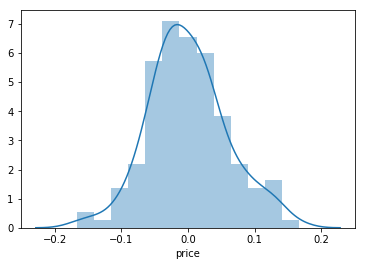

In [91]:
# Compute residual values for train data
residual = y - lr.predict(X)

# Plot distplot of the residuals
sns.distplot(residual)

## Residuals distribution is Gaussian with 0 mean so for the LR model tuned, all the assumptions are valid

## Test Set Evaluation

In [92]:
# Extract test data
y_test = geely_test.pop('price')
X_test = geely_test[cols]

# Predict LR model output for test data
y_test_pred = lr.predict(X_test)

# Compute r2 score for test data
r2_score(y_test, y_test_pred)

## R2 on test data is 88.5% and train data is 90.7% so difference is less and thus LR model is generalised

0.8847114827076837

Text(0, 0.5, 'y_pred')

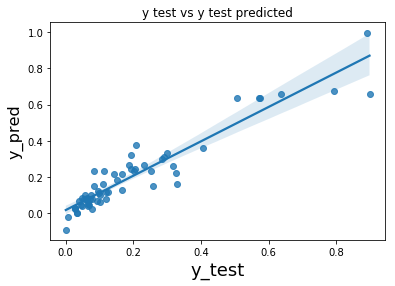

In [93]:
# Plotting y_test and y_test_pred to understand the spread.

# plt.scatter(y_test, y_test_pred)
sns.regplot(y_test, y_test_pred)
plt.title('y test vs y test predicted')
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

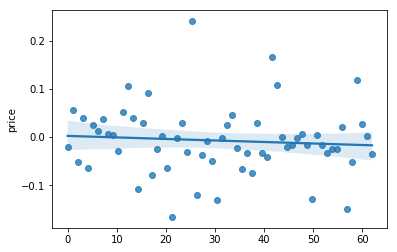

In [94]:
## Plotting residuals to check homoscedasticity
## Analysis - No pattern in residuals so seems like homoscadastic

sns.regplot(np.linspace(0, 62, y_test.shape[0]), y_test - y_test_pred)

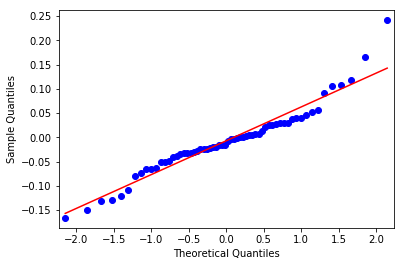

In [95]:
## Plotting qqplot to match test data residual distribution to standardized normal distribution 
## Analyis test data residuals are indeed normally distributed except few points 

sm.qqplot(y_test - y_test_pred, line='s')
plt.show()